In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio  # for saving .gif

import tifffile

def create_timelapse(data_dir, output_gif="timelapse.gif", fps=5, z=None):
    """
    Create a timelapse animation from a directory of TIFF files.
    
    Args:
        data_dir (str): Path to directory containing TIFF files
        output_gif (str): Path for output GIF file
        fps (int): Frames per second for animation and GIF
    """

    # Load TIFF files
    tiff_files = sorted(f for f in os.listdir(data_dir) if f.endswith('.tif'))
    
    frames = []
    for fname in tiff_files:
        path = os.path.join(data_dir, fname)
        img = tifffile.imread(path)
        frames.append(img)

    # Create stack and perform MIP or select Z-slice
    stack = np.stack(frames, axis=0)
    if z is None:
        data_2d = stack.max(axis=1)  # MIP along Z-axis if 3D
    else:
        data_2d = stack[:, z, ...]  # Select Z-slice
    
    # Create matplotlib animation
    fig, ax = plt.subplots()
    im = ax.imshow(data_2d[0], cmap='gray', animated=True)
    ax.set_title("Time-lapse")
    
    def update(frame_idx):
        im.set_data(data_2d[frame_idx])
        return [im]
    
    interval = 1000 // fps  # Convert fps to milliseconds interval
    ani = animation.FuncAnimation(fig, update, frames=range(data_2d.shape[0]),
                                interval=interval, blit=True)
    
    # Save as GIF
    gif_frames = []
    for i in range(data_2d.shape[0]):
        frame_8bit = (data_2d[i] / data_2d[i].max() * 255).astype(np.uint8)
        gif_frames.append(frame_8bit)
    
    imageio.mimsave(output_gif, gif_frames, fps=fps)
    print(f"Wrote {output_gif}")
    
    return fig, ani

Wrote ./videos/cell0006_R0007_raw.gif


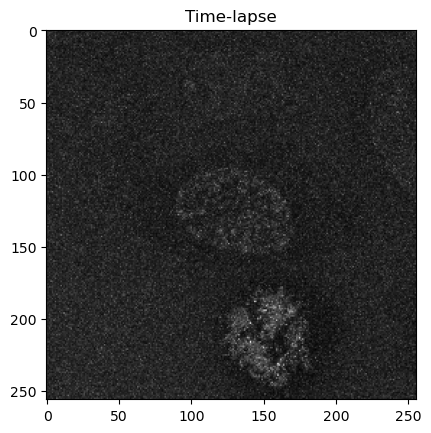

Wrote ./videos/cell0006_R0007_conc.gif


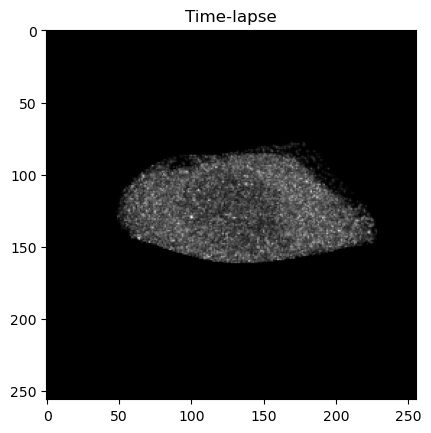

Wrote ./videos/cell0006_R0007_mask.gif


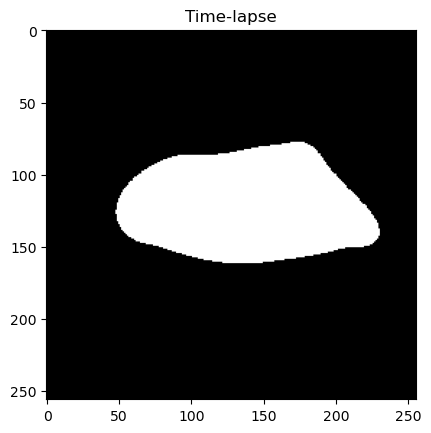

In [26]:
cell = "cell0006_R0007"
video_types = ["raw", "conc", "mask"]
for video_type in video_types:
    data_path = f"./mitotic_cell_atlas_v1.0.1_exampledata/Data_tifs/161122_gfpBUBR1cM04-A03_MitoSys1/{cell}/{video_type}tif"
    fig, ani = create_timelapse(data_path, f"./videos/{cell}_{video_type}.gif", fps=10)
    plt.show()